In [1]:
import time

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import regression as reg
import matplotlib.pyplot as plt

In [2]:
is_terminated = True
bench_mode = True

In [3]:
def load_data():
    df = pd.read_csv('../data/input/kc_house_data_cleaned.csv')

    X = df[df.columns[range(15)]].to_numpy()
    one = np.ones((X.shape[0], 1))
    X = np.concatenate((one, X), axis=1)
    y = df['price'].to_numpy()
    # y = (y - np.min(y)) / (np.max(y) - np.min(y))
    y = y/1e6
    y = y.reshape((X.shape[0], 1))

    return train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train, X_test, y_train, y_test = load_data()
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_train: {y_test.shape}')

X_train: (17277, 16), y_train: (17277, 1)
X_test: (4320, 16), y_train: (4320, 1)


In [5]:
import matplotlib.pyplot as plt

def plot_data(lm: reg.RegressionOpt):
    plt.plot(range(len(lm.loss_func_list)), lm.loss_func_list)
    plt.title(f'Loss function', fontsize=16)
    plt.ylabel('Value', fontsize=16)
    plt.xlabel('Count', fontsize=16)
    plt.show()

    plt.plot(range(len(lm.grad_norm_list)), lm.grad_norm_list)
    plt.title(f'Gradient norm', fontsize=16)
    plt.ylabel('Value', fontsize=16)
    plt.xlabel('Count', fontsize=16)
    plt.show()

In [6]:
def save_data(lm: reg.RegressionOpt):
    d = {
        'loss_func_list': lm.loss_func_list,
        'grad_norm_list': lm.grad_norm_list
    }

    df = pd.DataFrame(data=d)

    file_name = 'lf_n_grn_' + str(lm.solver) + '_' + str(lm.step_size) + '.csv'
    df.to_csv('../data/output/' + file_name, index=False)

In [7]:
w_init = np.repeat(0, X_train.shape[1]).reshape((X_train.shape[1], 1))

GD method

In [8]:
start = time.time()

lm = reg.RegressionOpt(
    solver='gd',
    max_iter=10000,
    w=w_init,
    step_size=1,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=is_terminated,
    bench_mode=bench_mode
)

w = lm.fit_gd()

end = time.time()

# plot_data(lm)

# save_data(lm)
print(f'time: {end - start}')
print(f'count: {lm.count}, gradient norm: {lm.grad_norm_list[-1]}, loss func: {lm.loss_func_list[-1]}')
# print(lm.w)

time: 0.055968523025512695
count: 4358, gradient norm: 0.7832325359150631, loss func: 0.21468643959334227


Newton method

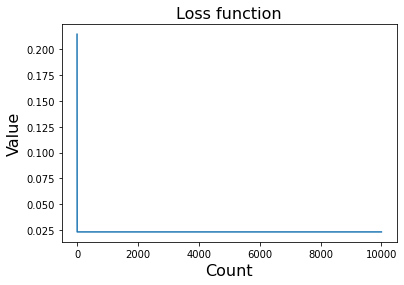

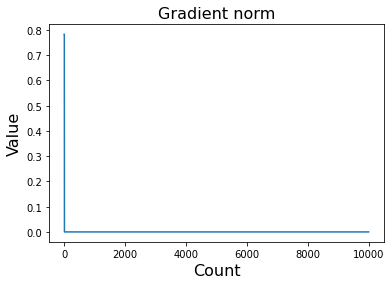

time: 5.975289344787598
count: 10000, gradient norm: 1.829940283910263e-16, loss func: 0.023211385950436696


In [21]:
start = time.time()

lm = reg.RegressionOpt(
    solver='newton',
    max_iter=10000,
    step_size=1,
    w=w_init,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=False,
    bench_mode=False
)

lm.fit_newton()

end = time.time()

plot_data(lm)
save_data(lm)

print(f'time: {end - start}')
print(f'count: {lm.count}, gradient norm: {lm.grad_norm_list[-1]}, loss func: {lm.loss_func_list[-1]}')

Accelerated GD method

In [10]:
start = time.time()

lm = reg.RegressionOpt(
    solver='agd',
    max_iter=10000,
    step_size=0.5,
    w=w_init,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=is_terminated,
    bench_mode=bench_mode
)

lm.fit_acc_gd()

end = time.time()

# plot_data(lm)
# save_data(lm)

print(f'time: {end - start}')
print(f'count: {lm.count}, gradient norm: {lm.grad_norm_list[-1]}, loss func: {lm.loss_func_list[-1]}')
# print(lm.w)

time: 0.0062808990478515625
count: 377, gradient norm: 0.7832325359150631, loss func: 0.21468643959334227


In [11]:
# delta = 1e-14
# t0 = 2e-12
# t = []
# for i in range(100):
#     t.append(t0 + i * delta)
#
# for step in t:
#     lm = reg.RegressionOpt(
#     solver='gd',
#     max_iter=500,
#     step_size=step,
#     w=w_init,
#     X_train=X_train,
#     y_train=y_train,
#     X_test=X_test,
#     y_test=y_test,
#     terminate=True
#     )
#
#     lm.fit_gd()
#
#     print(f'step size: {step}, count: {lm.count}, gradient norm: {lm.grad_norm_list[-1]}, loss function: {lm.loss_func_list[-1]}')


GD with backtracking

In [12]:
start = time.time()

lm = reg.RegressionOpt(
    solver='bgd',
    backtracking=True,
    max_iter=10000,
    step_size=128,
    alpha=0.5,
    beta=0.5,
    w=w_init,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=is_terminated
)

lm.fit_gd()

end = time.time()

# plot_data(lm)
# save_data(lm)

print(f'time: {end - start}')
print(f'count: {lm.count}, inner_count: {lm.inner_count}, gradient norm: {lm.grad_norm_list[-1]}, loss func: {lm.loss_func_list[-1]}')
# print(lm.w)

time: 0.28133296966552734
count: 286, inner_count: 1562, gradient norm: 9.86831263088978e-05, loss func: 0.023221719759706844


Accelerated GD with backtracking

In [13]:
# import regression as reg
#
# t = [4e-13]
# for i in range(25):
#     t.append(1.01 * t[i])
#
# # print(t)
#
# for step in t:
#     lm = reg.RegressionOpt(
#         backtracking=True,
#         max_iter=500,
#         step_size=step,
#         alpha=0.5,
#         beta=0.5,
#         w=w_init,
#         X_train=X_train,
#         y_train=y_train,
#         X_test=X_test,
#         y_test=y_test,
#         terminate=True
#     )
#
#     lm.fit_acc_gd()
#     # plot_data(lm)
#
#     print(f'step size: {step}, count: {lm.count}, gradient norm: {lm.grad_norm_list[-1]}, loss function: {lm.loss_func_list[-1]}')

In [14]:
start = time.time()

lm = reg.RegressionOpt(
    solver='agd_bt',
    backtracking=True,
    max_iter=10000,
    step_size=3,
    alpha=0.5,
    beta=0.5,
    w=w_init,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=is_terminated,
    bench_mode=bench_mode
)

lm.fit_acc_gd()

end = time.time()

# plot_data(lm)
# save_data(lm)

print(f'time: {end - start}')
print(f'step size: {lm.step_size}, count: {lm.count}, inner_count: {lm.inner_count}, gradient norm: {lm.grad_norm_list[-1]}, loss function: {lm.loss_func_list[-1]}')

time: 0.07507157325744629
step size: 3, count: 161, inner_count: 314, gradient norm: 0.7832325359150631, loss function: 0.21468643959334227


In [15]:
w = np.linalg.solve(np.dot(X_train.T, X_train), np.dot(X_train.T, y_train))
print(w)

[[-0.55645998]
 [-1.39628217]
 [ 0.37967969]
 [-2.30413085]
 [-0.0433285 ]
 [ 0.07551949]
 [ 0.57860558]
 [ 0.17033881]
 [ 0.07757404]
 [ 1.21555499]
 [ 3.02089375]
 [ 1.6612628 ]
 [ 0.16387727]
 [-0.5221636 ]
 [ 0.43503326]
 [-0.07888688]]


In [16]:
from sklearn.linear_model import LinearRegression

start = time.time()
lm = LinearRegression()
lm.fit(X_train, y_train)
end = time.time()
# lm.coef_
print(f'time: {end - start}')
print(f'train score: {lm.score(X_train, y_train)}')
print(f'test score: {lm.score(X_test, y_test)}')

time: 0.014867305755615234
train score: 0.6589823651340456
test score: 0.6352017821787517


Accelerated GD with backtracking

In [17]:
# delta = 1e-11
# t0 = 6.251678e-4
# t = []
# for i in range(50):
#     t.append(t0 + i * delta)
# loop = 0
# for step in t:
#     loop += 1
#     lm = reg.RegressionOpt(
#     solver='agd_bt',
#     backtracking=True,
#     max_iter=50,
#     step_size=step,
#     alpha=0.5,
#     beta=0.5,
#     w=w_init,
#     X_train=X_train,
#     y_train=y_train,
#     X_test=X_test,
#     y_test=y_test,
#     terminate=True
#     )
#
#     lm.fit_acc_gd()
#     # plot_data(lm)
#     # save_data(lm)
#
#     print(f'loop: {loop}, step size: {lm.step_size}, count: {lm.count}, inner_count: {lm.inner_count}, gradient norm: {lm.grad_norm_list[-1]}, loss function: {lm.loss_func_list[-1]}')

In [18]:
w = np.linalg.solve(np.dot(X_train.T, X_train), np.dot(X_train.T, y_train))
print(w)

[[-0.55645998]
 [-1.39628217]
 [ 0.37967969]
 [-2.30413085]
 [-0.0433285 ]
 [ 0.07551949]
 [ 0.57860558]
 [ 0.17033881]
 [ 0.07757404]
 [ 1.21555499]
 [ 3.02089375]
 [ 1.6612628 ]
 [ 0.16387727]
 [-0.5221636 ]
 [ 0.43503326]
 [-0.07888688]]
